## Diabetes Prediction

In [47]:
# import the libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import mean_squared_error
from sklearn import metrics
from sklearn.metrics import ConfusionMatrixDisplay, accuracy_score, classification_report, confusion_matrix
import joblib

In [4]:

# read the dataset
data = pd.read_csv("diabetes.csv")

In [5]:
## read the first few and last few data
data.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [6]:
data.tail()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1
767,1,93,70,31,0,30.4,0.315,23,0


In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [8]:
## describe the statistics
data.describe().T

,count,mean,std,min,25%,50%,75%,max
Pregnancies,768.0,3.845052,3.369578,0.000,1.00000,3.0000,6.00000,17.00
Glucose,768.0,120.894531,31.972618,0.000,99.00000,117.0000,140.25000,199.00
BloodPressure,768.0,69.105469,19.355807,0.000,62.00000,72.0000,80.00000,122.00
SkinThickness,768.0,20.536458,15.952218,0.000,0.00000,23.0000,32.00000,99.00
Insulin,768.0,79.799479,115.244002,0.000,0.00000,30.5000,127.25000,846.00
BMI,768.0,31.992578,7.884160,0.000,27.30000,32.0000,36.60000,67.10
DiabetesPedigreeFunction,768.0,0.471876,0.331329,0.078,0.24375,0.3725,0.62625,2.42
Age,768.0,33.240885,11.760232,21.000,24.00000,29.0000,41.00000,81.00
Outcome,768.0,0.348958,0.476951,0.000,0.00000,0.0000,1.00000,1.00


In [9]:
data.isna().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

<Axes: >

<Figure size 1800x1200 with 0 Axes>

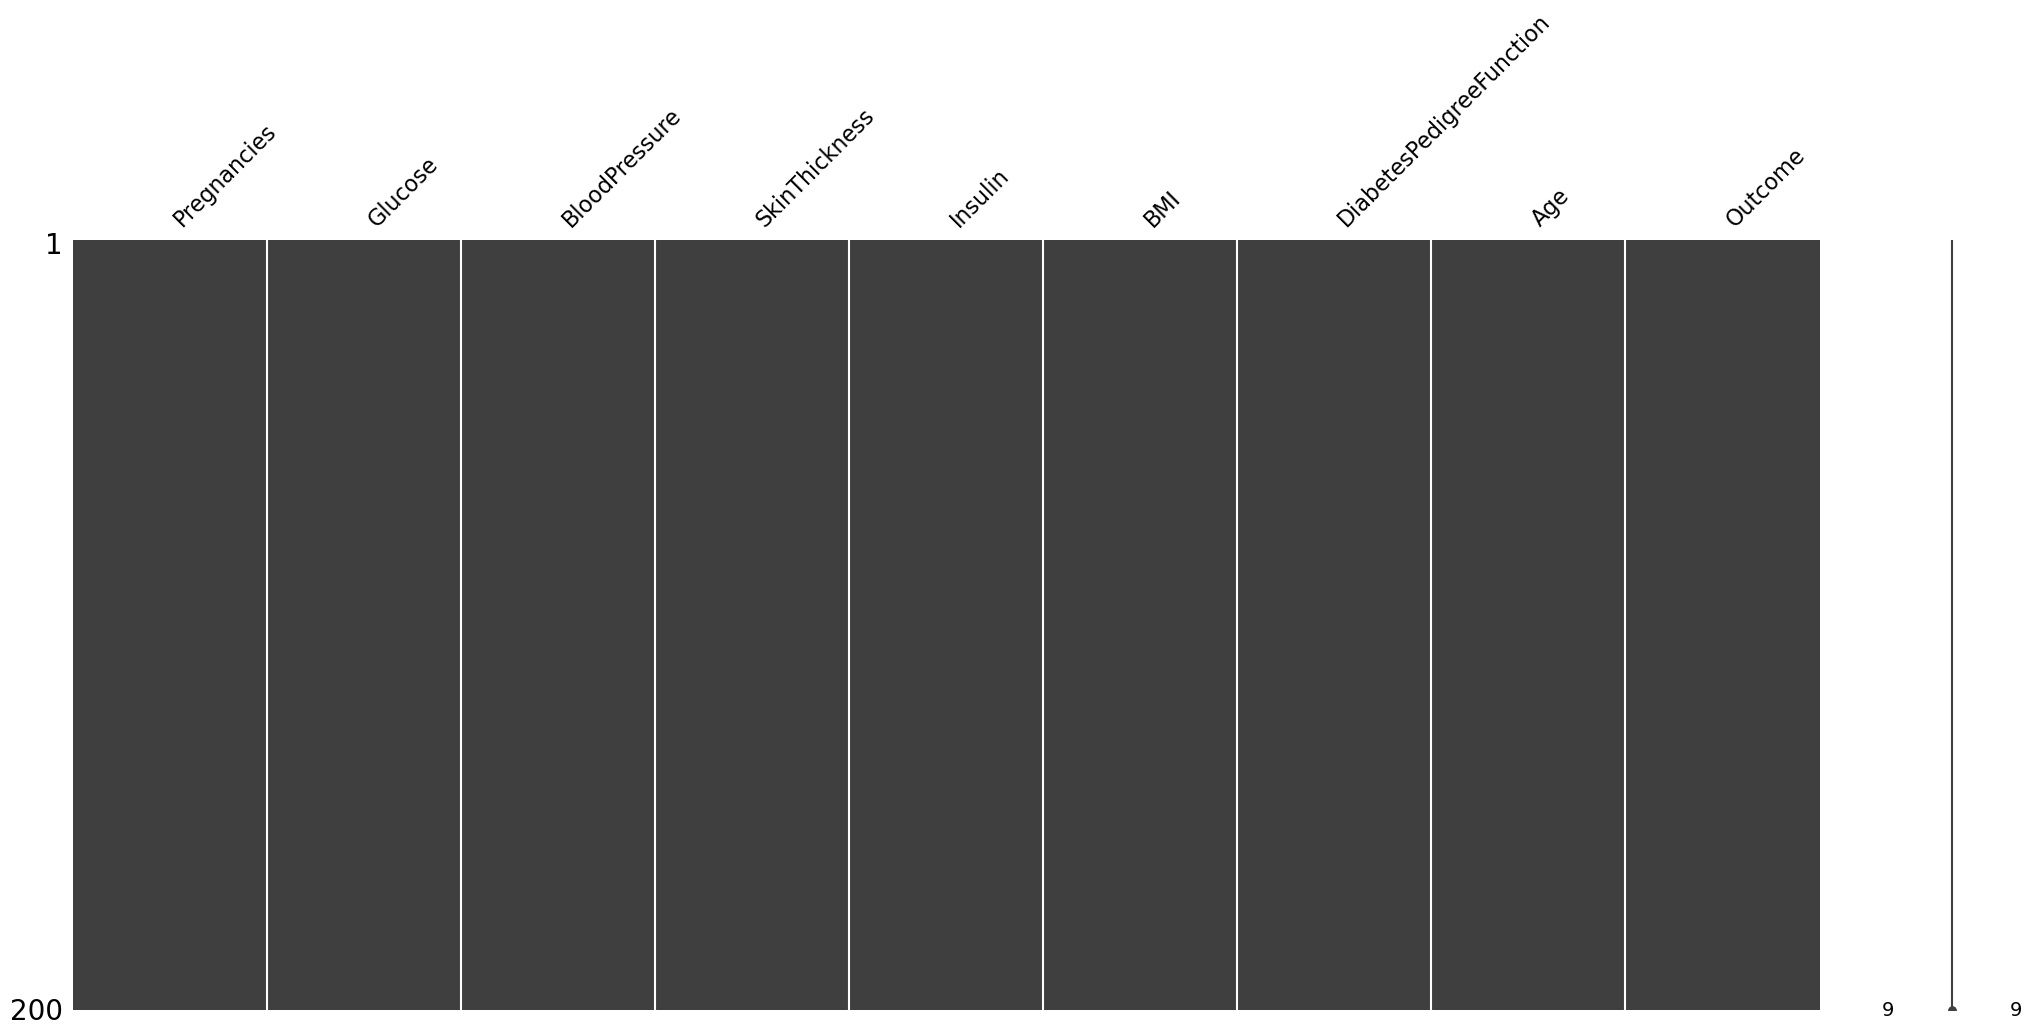

In [10]:
# visualize the missing values for sample of 200
plt.figure(figsize = (18,12))
msno.matrix(data.sample(200))

<Axes: >

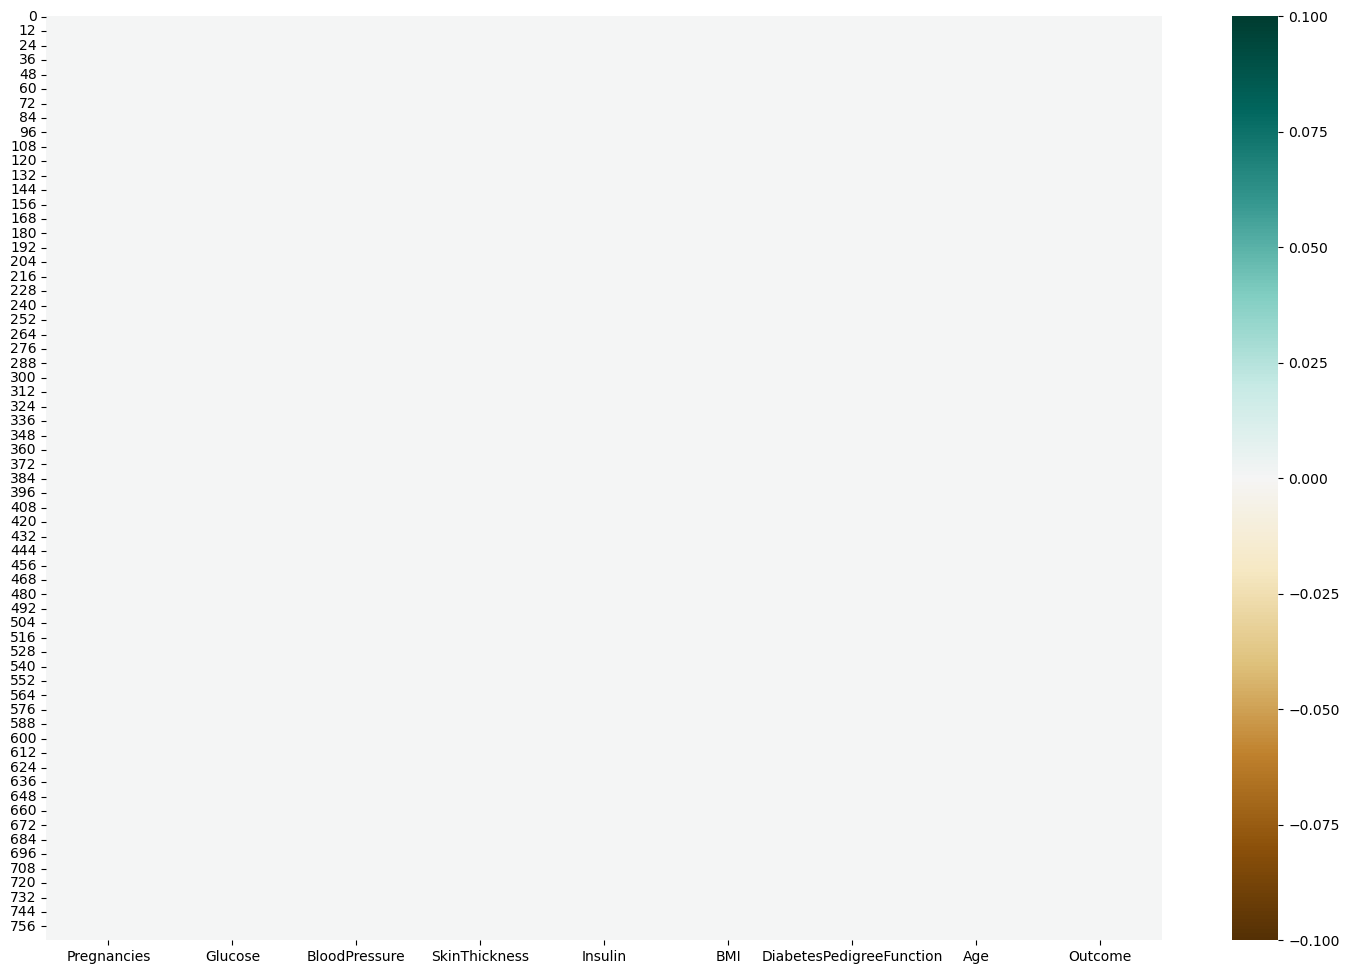

In [11]:
plt.figure(figsize = (18,12))
sns.heatmap(data.isna(),cmap='BrBG')

he dendrogram allows you to more fully correlate variable completion, revealing trends deeper than the pairwise ones visible in the correlation heatmap:

In [12]:
#### check skewness and kurtosis
data.skew()

Pregnancies                 0.901674
Glucose                     0.173754
BloodPressure              -1.843608
SkinThickness               0.109372
Insulin                     2.272251
BMI                        -0.428982
DiabetesPedigreeFunction    1.919911
Age                         1.129597
Outcome                     0.635017
dtype: float64

In [13]:
data.kurt()

Pregnancies                 0.159220
Glucose                     0.640780
BloodPressure               5.180157
SkinThickness              -0.520072
Insulin                     7.214260
BMI                         3.290443
DiabetesPedigreeFunction    5.594954
Age                         0.643159
Outcome                    -1.600930
dtype: float64

C:\Users\prajw\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\prajw\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\prajw\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\prajw\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating

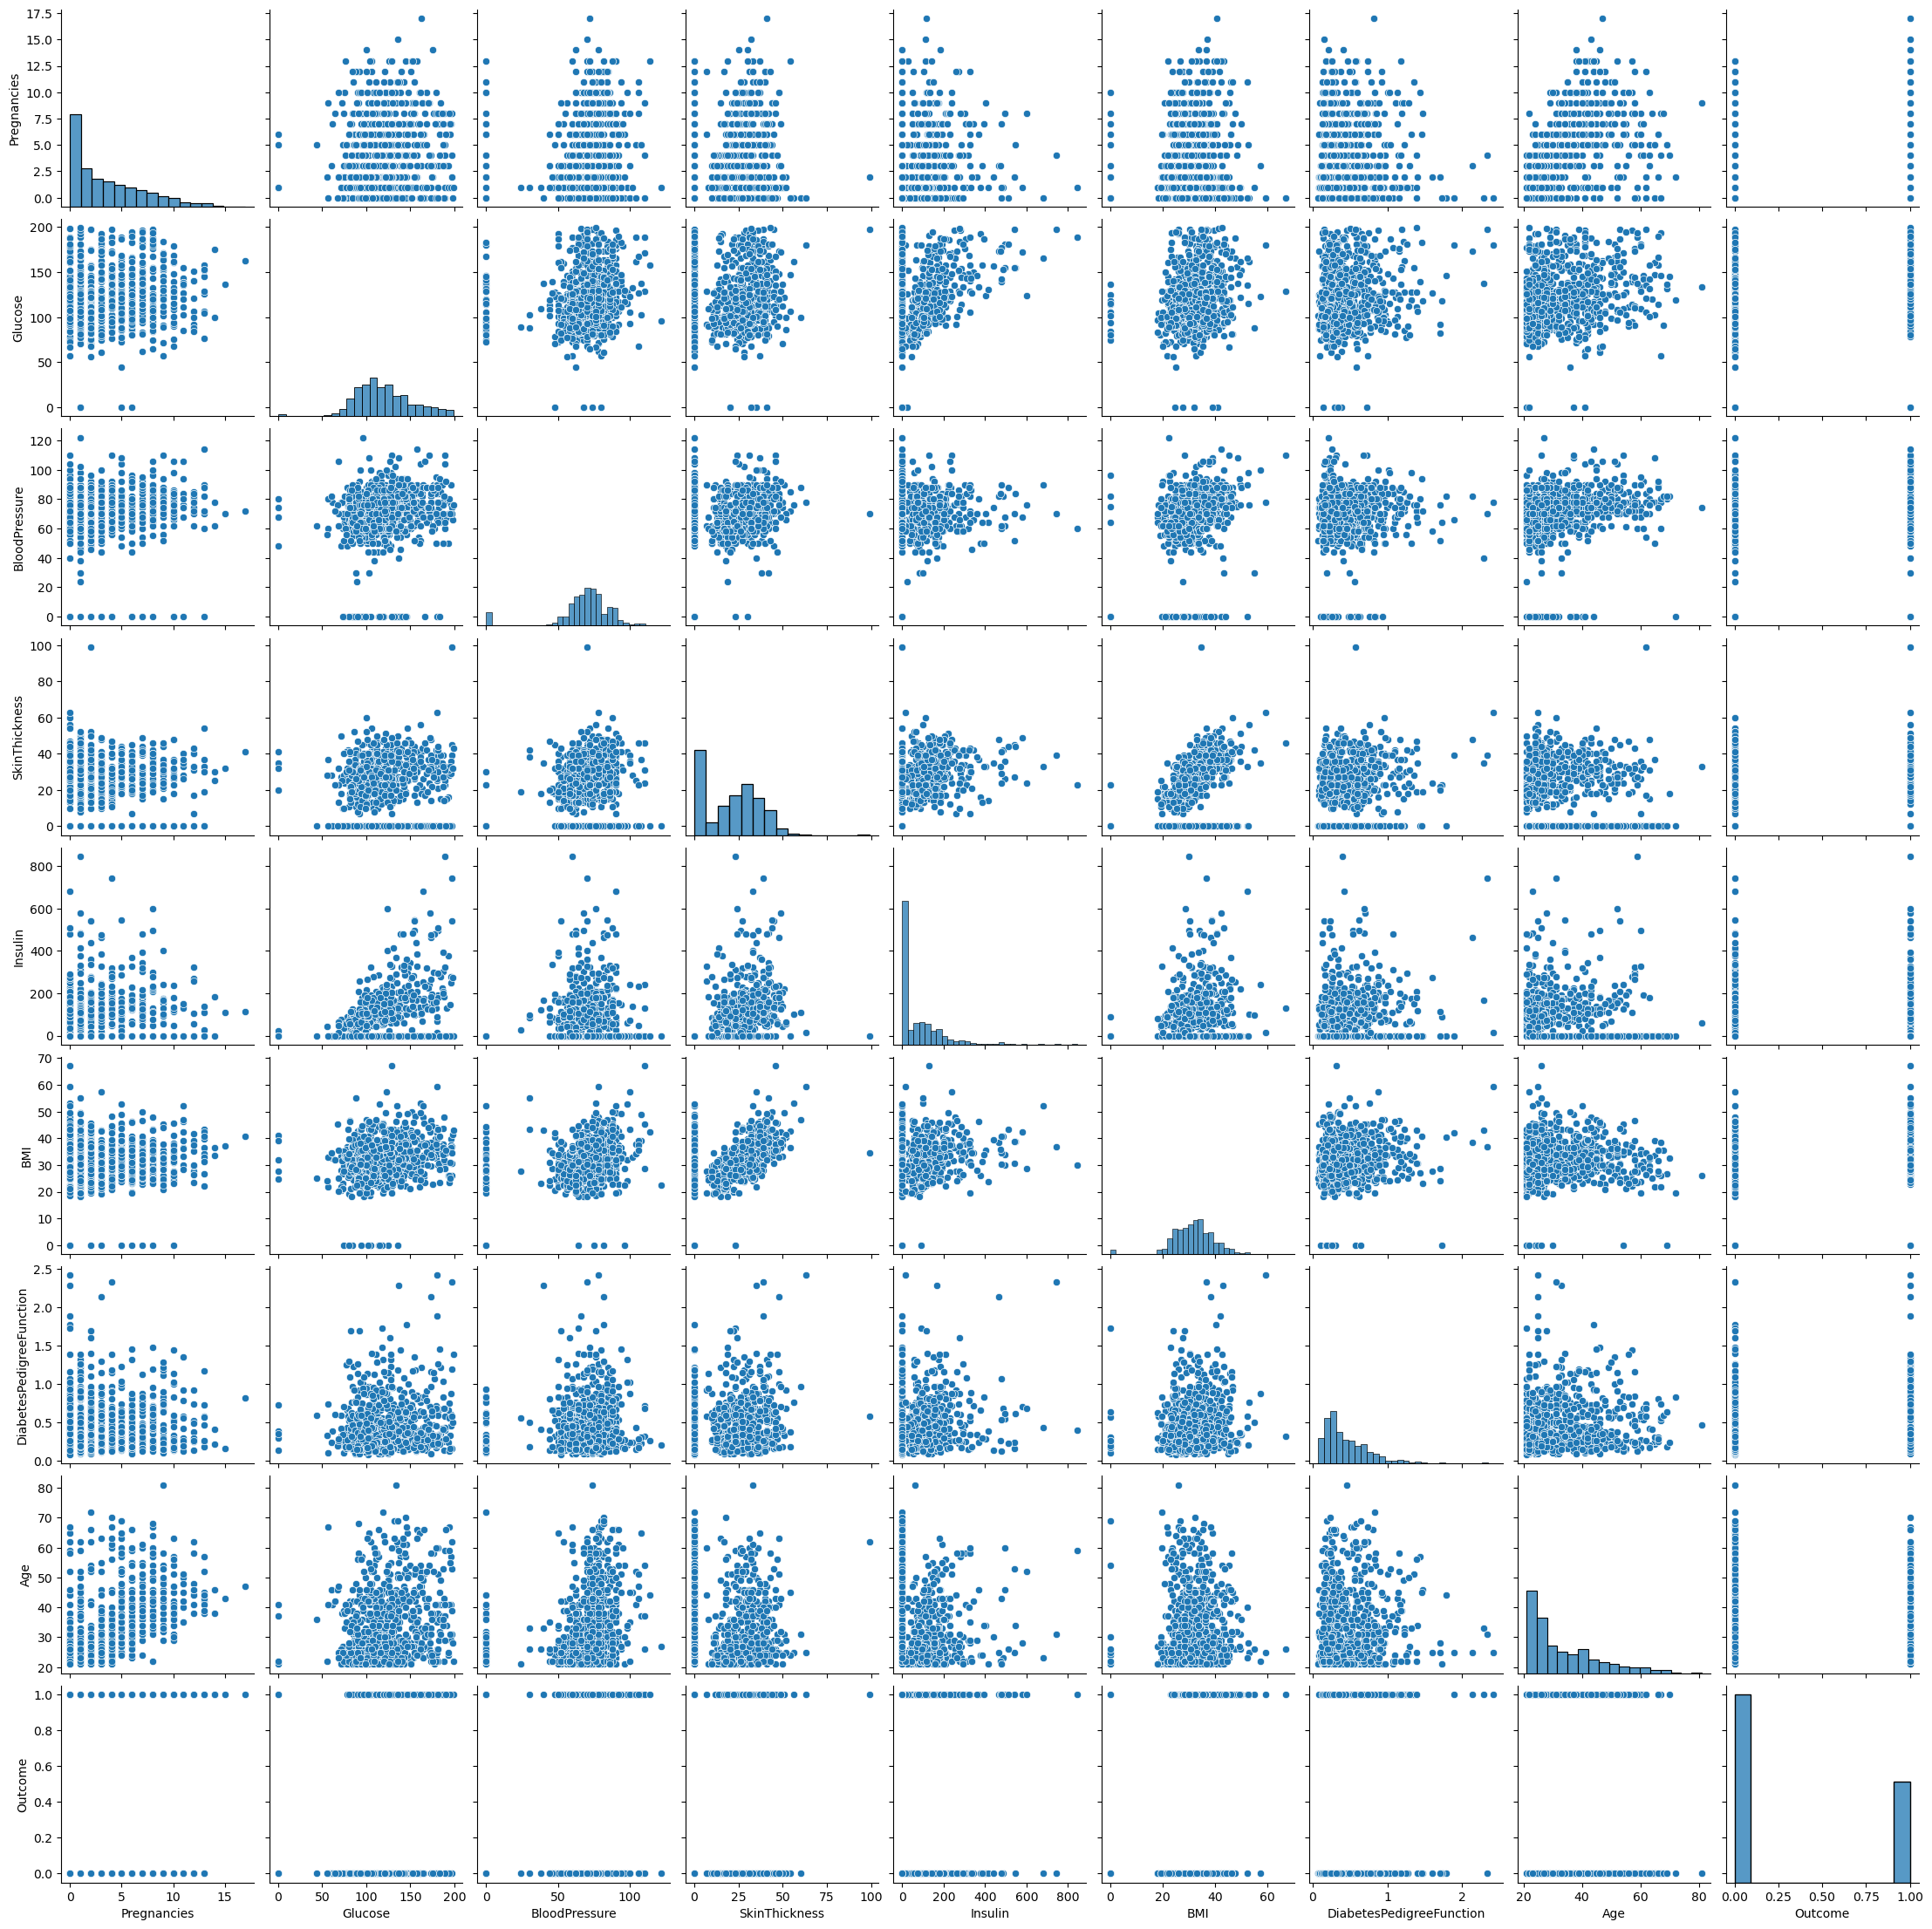

In [14]:
sns.pairplot(data = data)

<Axes: >

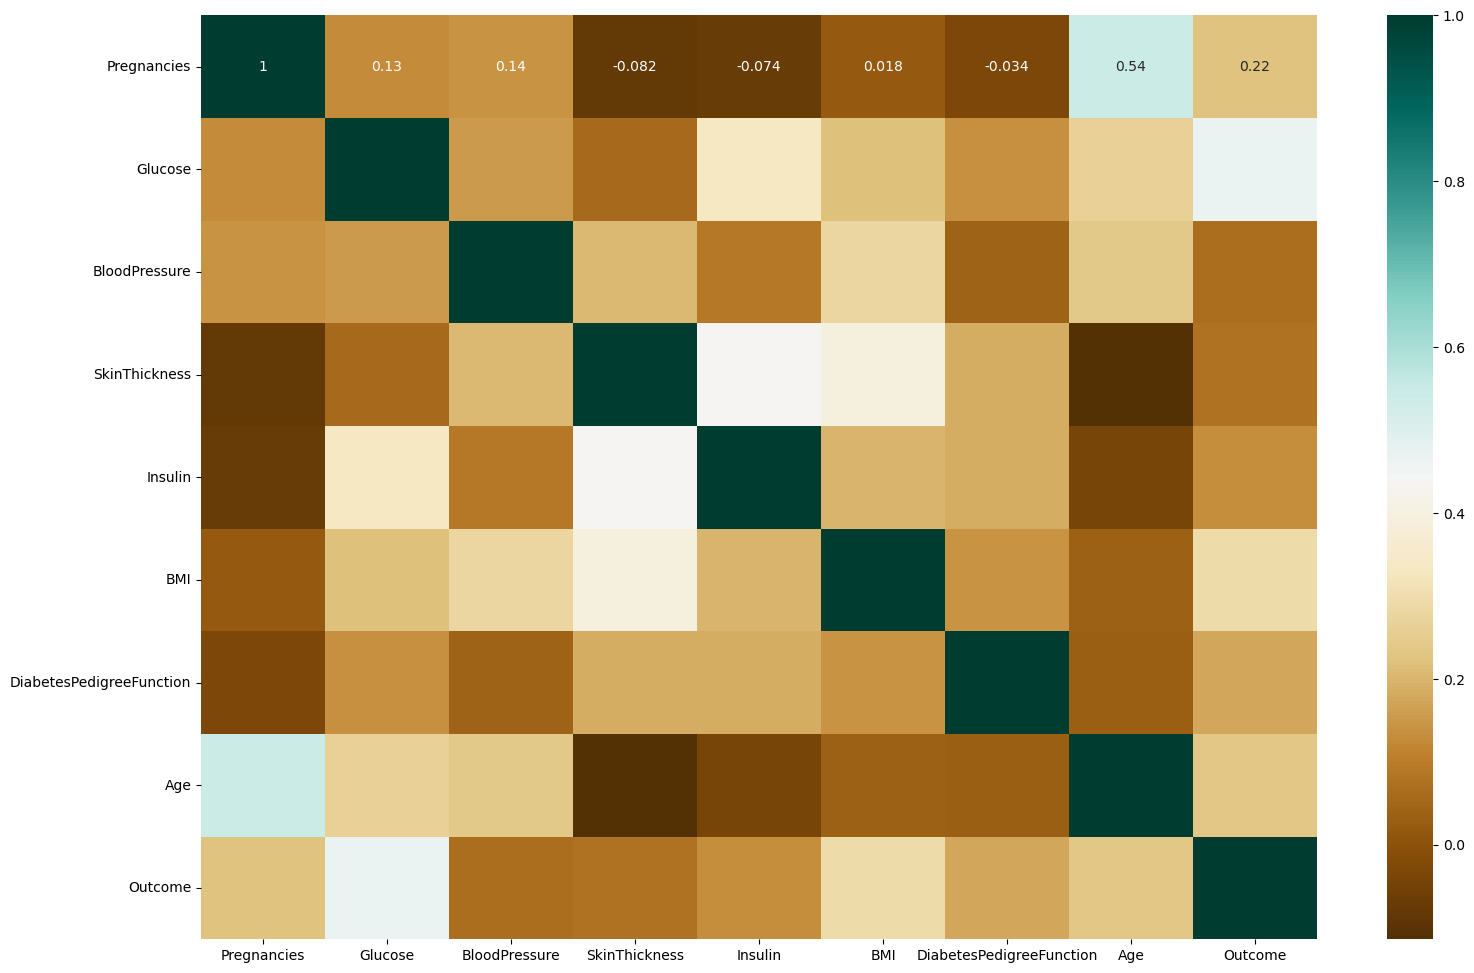

In [15]:
correlation = data.corr()
plt.figure(figsize = (18,12))
sns.heatmap(correlation, cmap = 'BrBG', annot = True)

In [16]:
corr_report = data.corr()['Outcome']
print(corr_report)

Pregnancies                 0.221898
Glucose                     0.466581
BloodPressure               0.065068
SkinThickness               0.074752
Insulin                     0.130548
BMI                         0.292695
DiabetesPedigreeFunction    0.173844
Age                         0.238356
Outcome                     1.000000
Name: Outcome, dtype: float64


## Dist plot for the visualization

C:\Users\prajw\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\prajw\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\prajw\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\prajw\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating

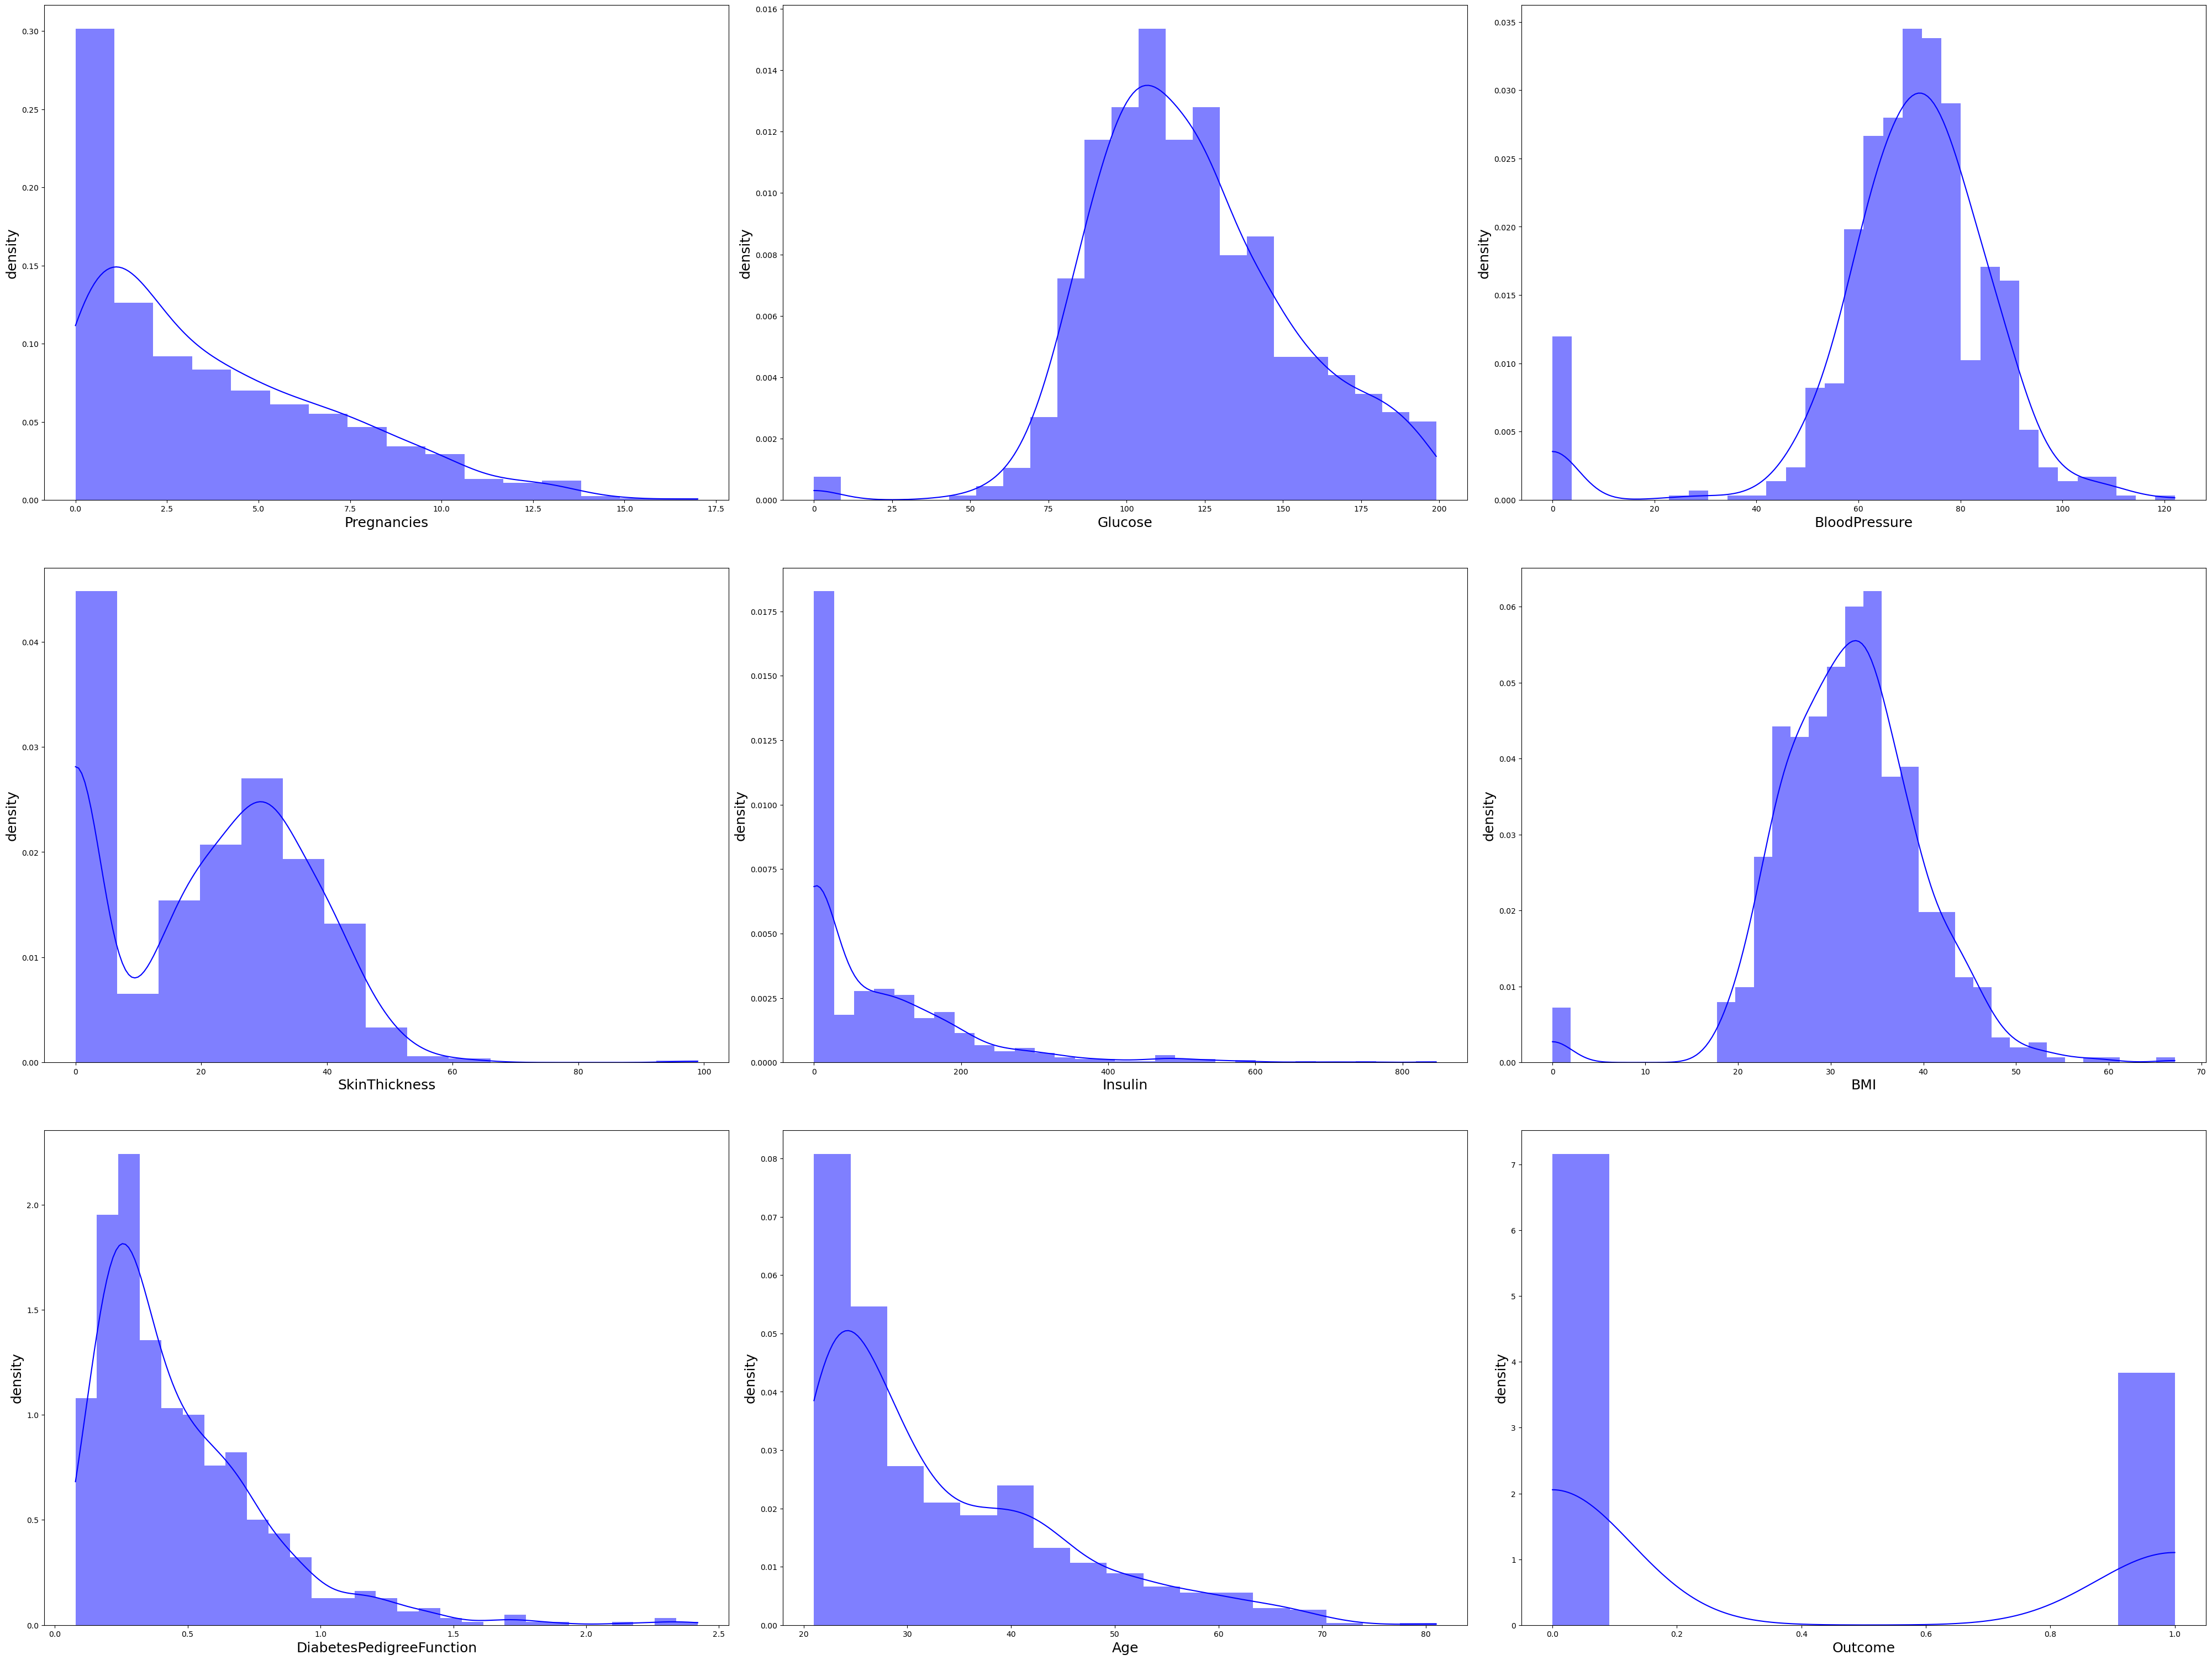

In [17]:
# create hist and kde plots to observe the data distribution
fig, ax = plt.subplots(ncols=3, nrows=3, figsize=(40,30))
index = 0
ax = ax.flatten()

for col, value in data.items():
    col_dist = sns.histplot(value, ax=ax[index], color='blue',kde=True, stat="density", linewidth=0)
    col_dist.set_xlabel(col,fontsize=18)
    col_dist.set_ylabel('density',fontsize=18)
    index += 1
plt.tight_layout(pad=0.5, w_pad=0.7, h_pad=5.0)

In [18]:
data.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


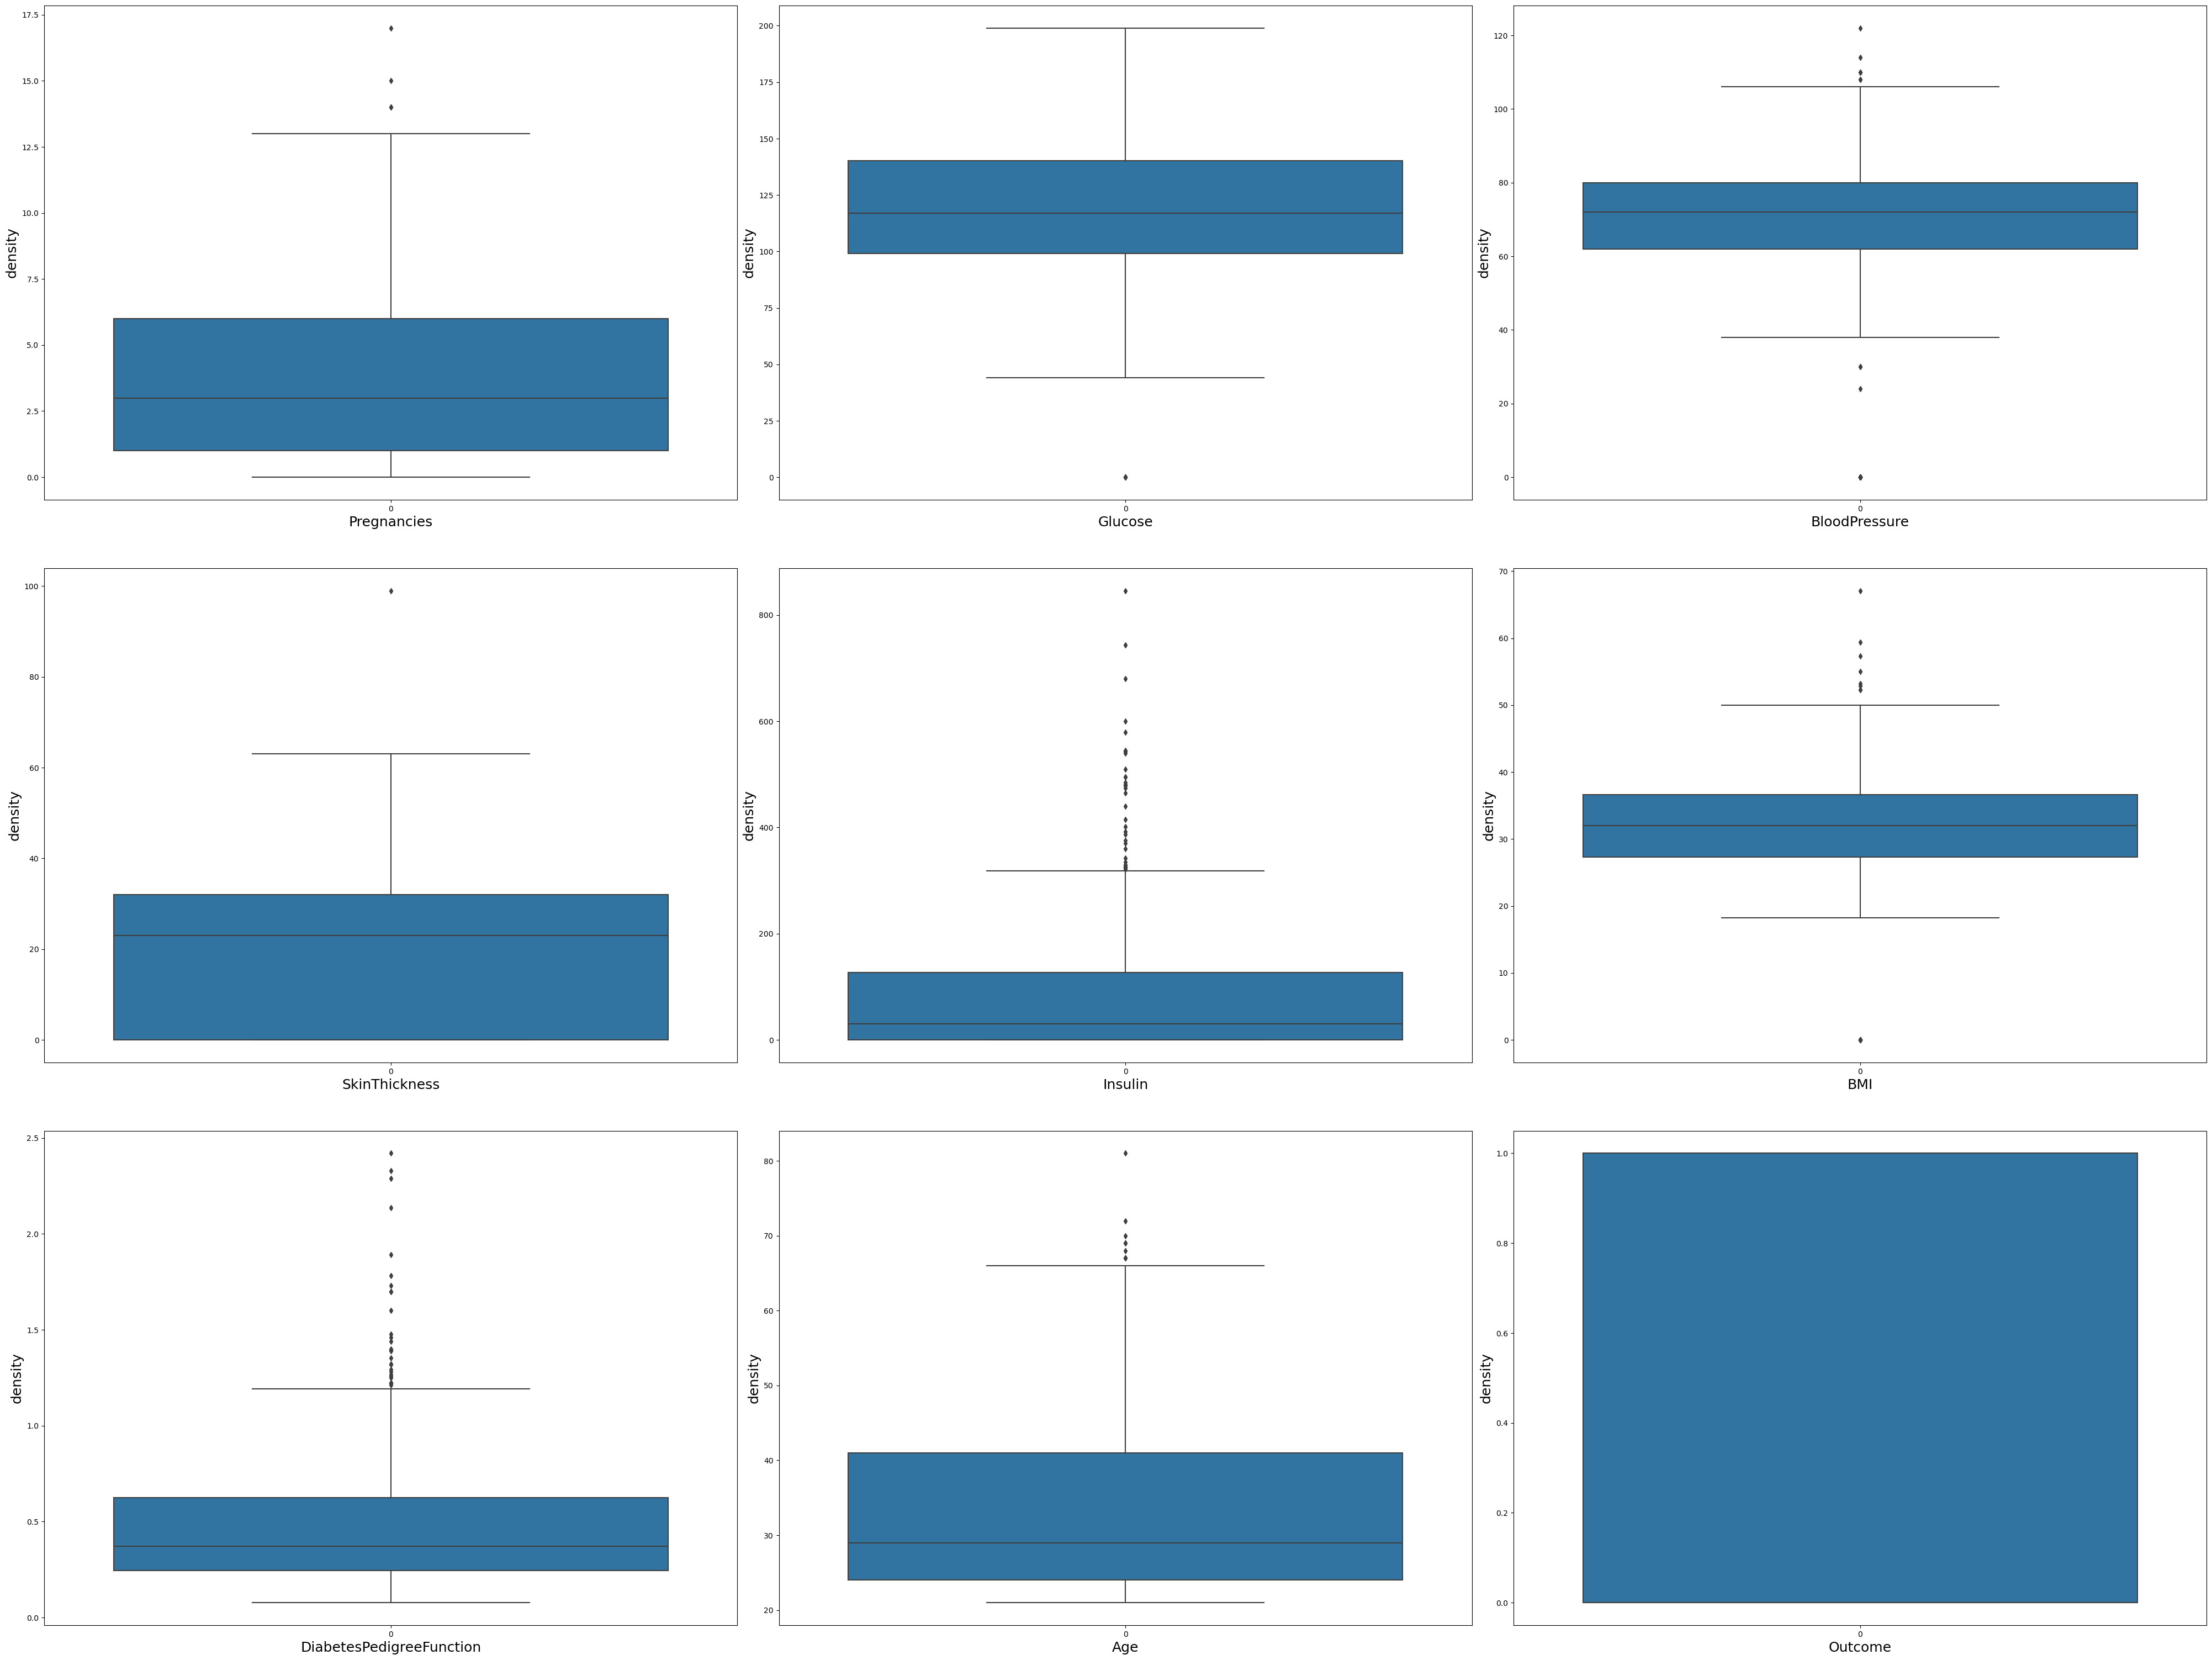

In [19]:
# create hist and kde plots to observe the data distribution
fig, ax = plt.subplots(ncols=3, nrows=3, figsize=(40,30))
index = 0
ax = ax.flatten()

for col, value in data.items():
    col_dist = sns.boxplot(value, ax=ax[index])
    col_dist.set_xlabel(col,fontsize=18)
    col_dist.set_ylabel('density',fontsize=18)
    index += 1
plt.tight_layout(pad=0.5, w_pad=0.7, h_pad=5.0)

In [20]:
Q1 = data.quantile(0.25)
Q3 = data.quantile(0.75)
IQR = Q3 - Q1
print(IQR)

Pregnancies                   5.0000
Glucose                      41.2500
BloodPressure                18.0000
SkinThickness                32.0000
Insulin                     127.2500
BMI                           9.3000
DiabetesPedigreeFunction      0.3825
Age                          17.0000
Outcome                       1.0000
dtype: float64


In [21]:
# remove the outlier
data = data[~((data < (Q1 - 1.5 * IQR)) | (data > (Q3 + 1.5 * IQR))).any(axis = 1)]
data.shape

(639, 9)

<Axes: >

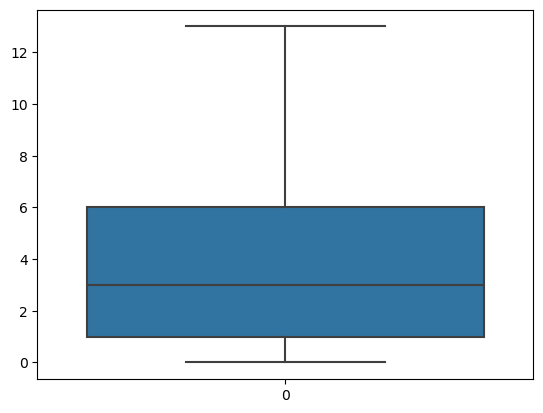

In [22]:
sns.boxplot(data["Pregnancies"])

<Axes: >

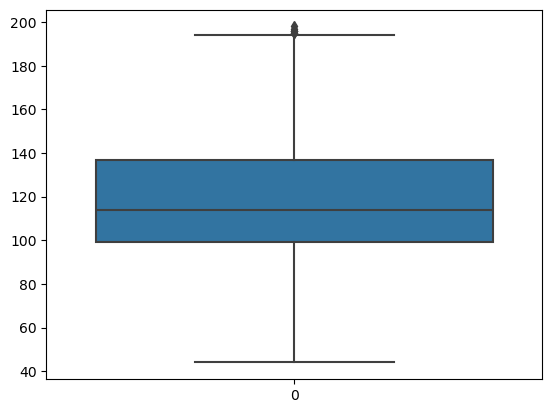

In [23]:
sns.boxplot(data["Glucose"])

In [24]:
data.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
5,5,116,74,0,0,25.6,0.201,30,0


<Axes: >

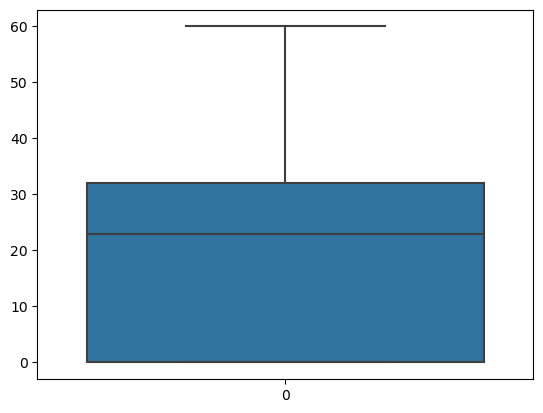

In [25]:
sns.boxplot(data['SkinThickness'])

See the boxplot report of everything

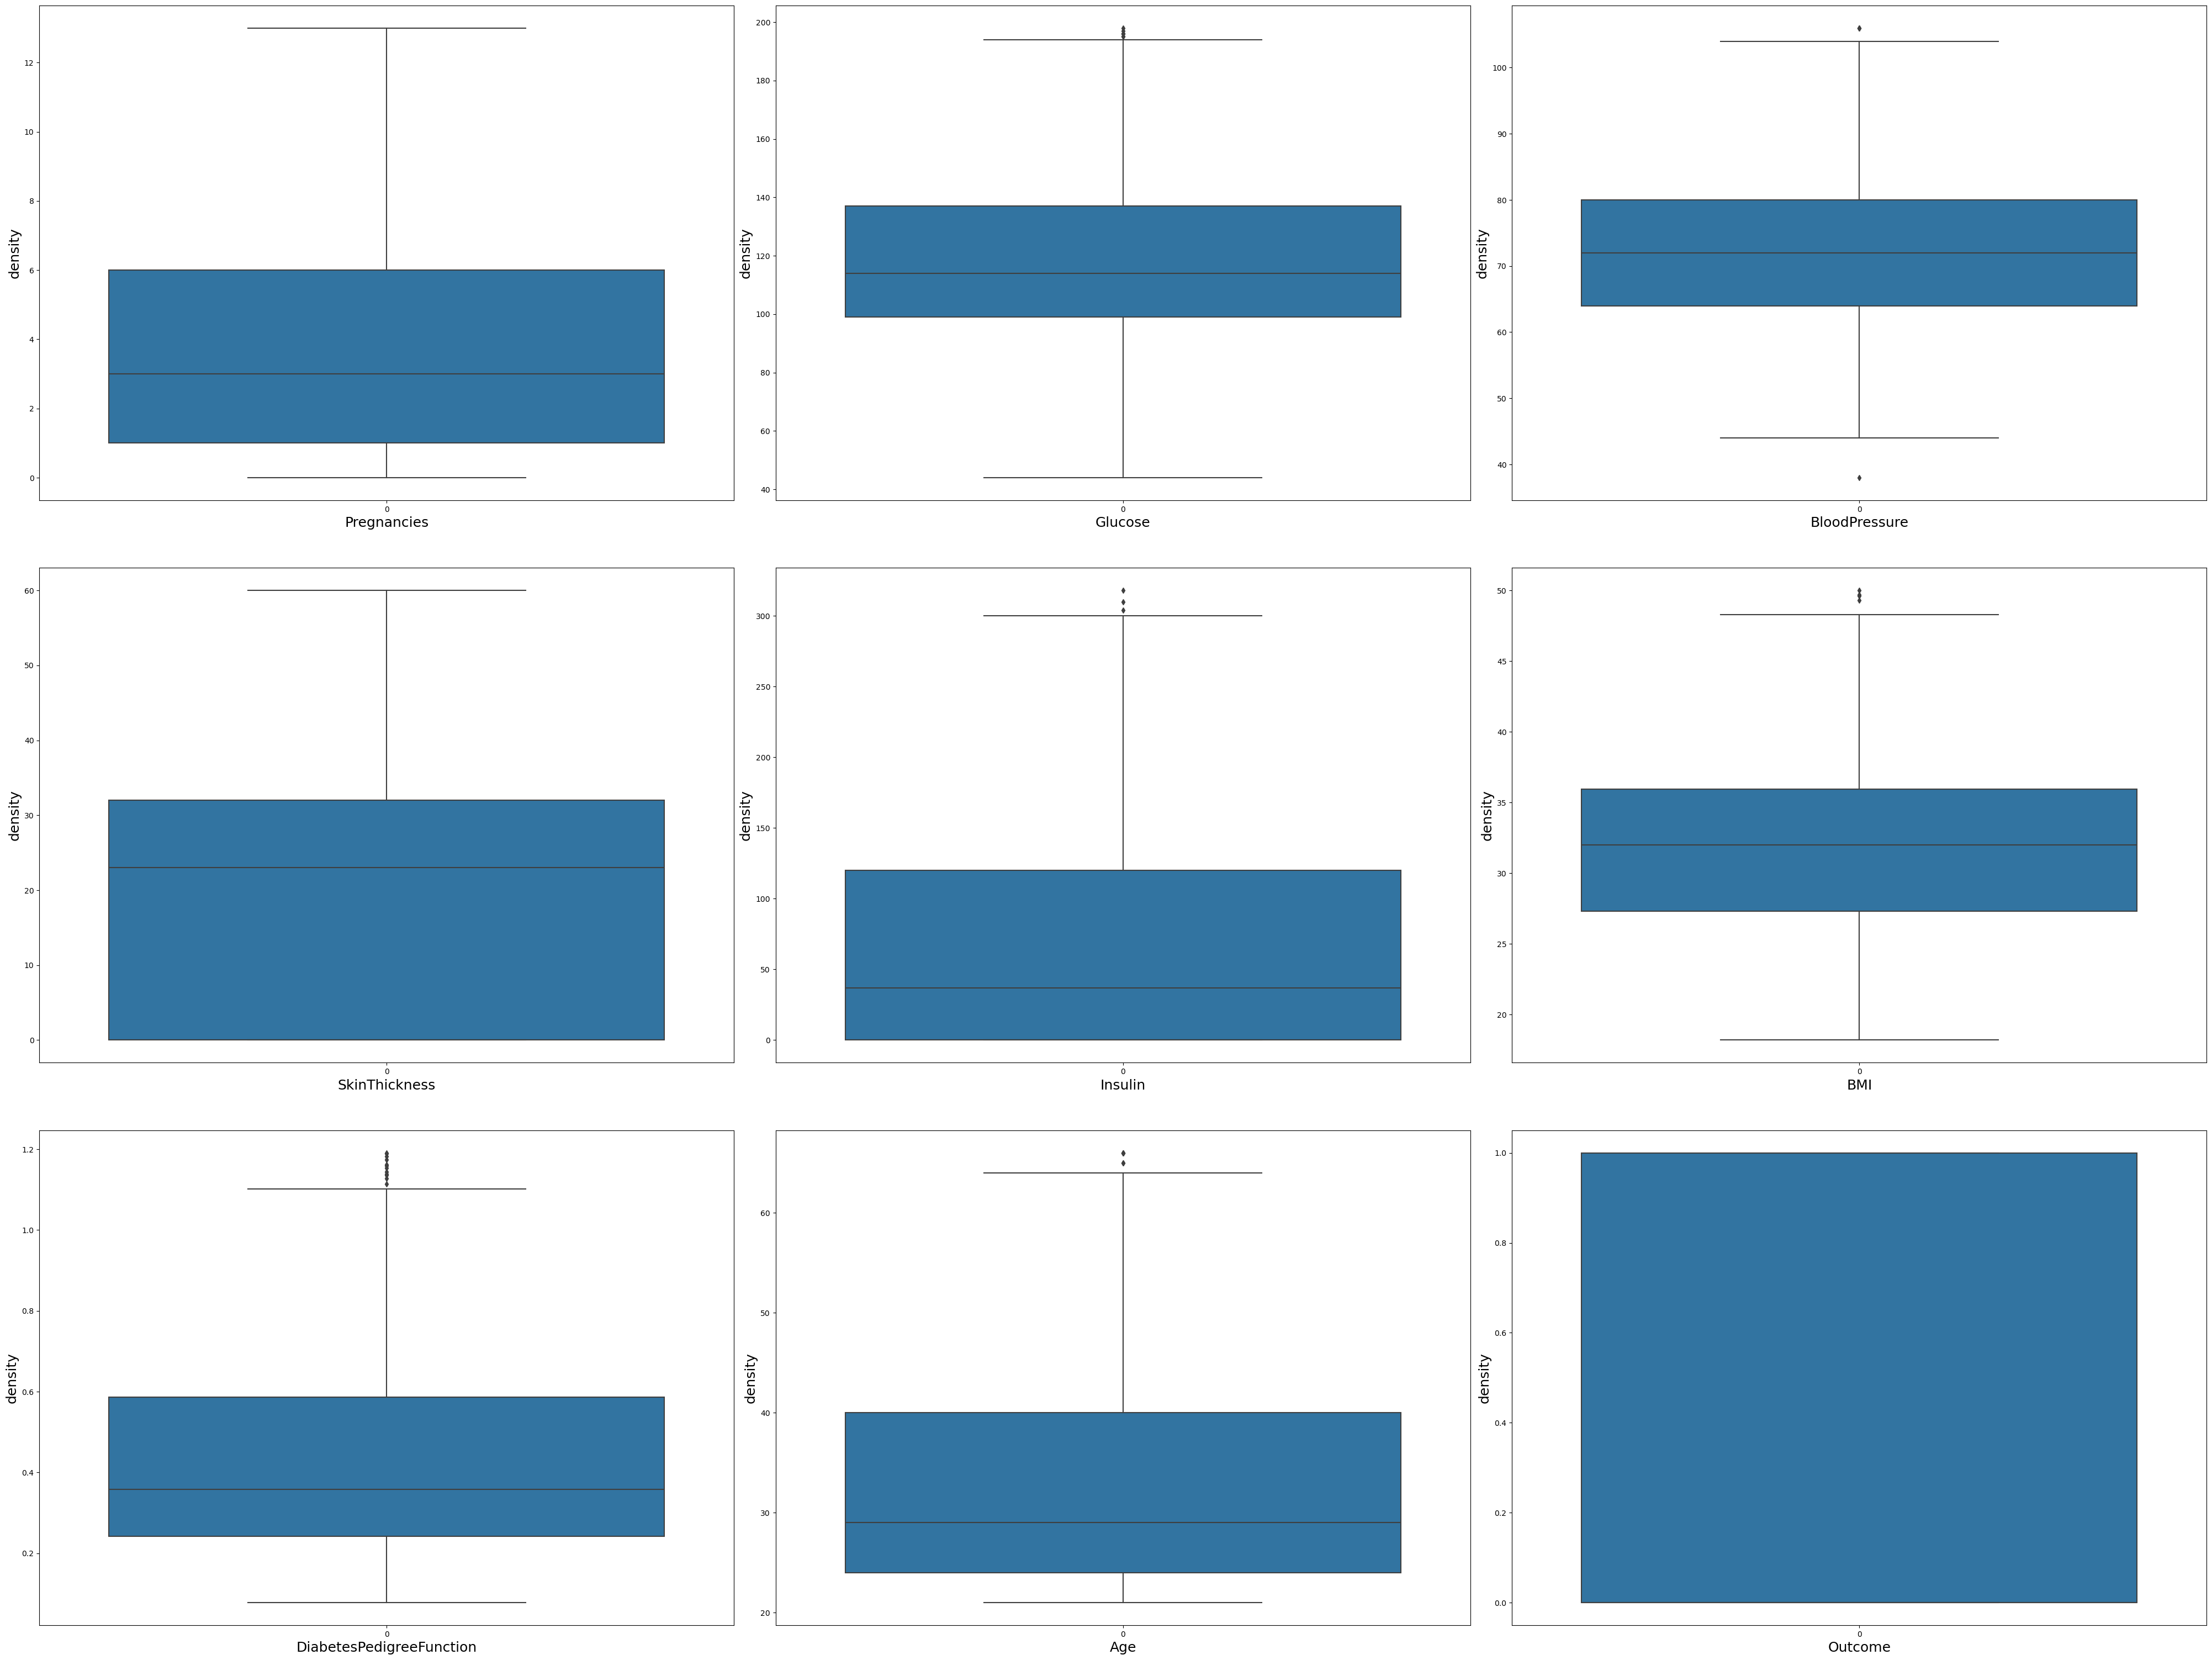

In [26]:
# create hist and kde plots to observe the data distribution
fig, ax = plt.subplots(ncols=3, nrows=3, figsize=(40,30))
index = 0
ax = ax.flatten()

for col, value in data.items():
    col_dist = sns.boxplot(value, ax=ax[index])
    col_dist.set_xlabel(col,fontsize=18)
    col_dist.set_ylabel('density',fontsize=18)
    index += 1
plt.tight_layout(pad=0.5, w_pad=0.7, h_pad=5.0)

In [27]:
data.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
5,5,116,74,0,0,25.6,0.201,30,0


<Axes: xlabel='Outcome', ylabel='count'>

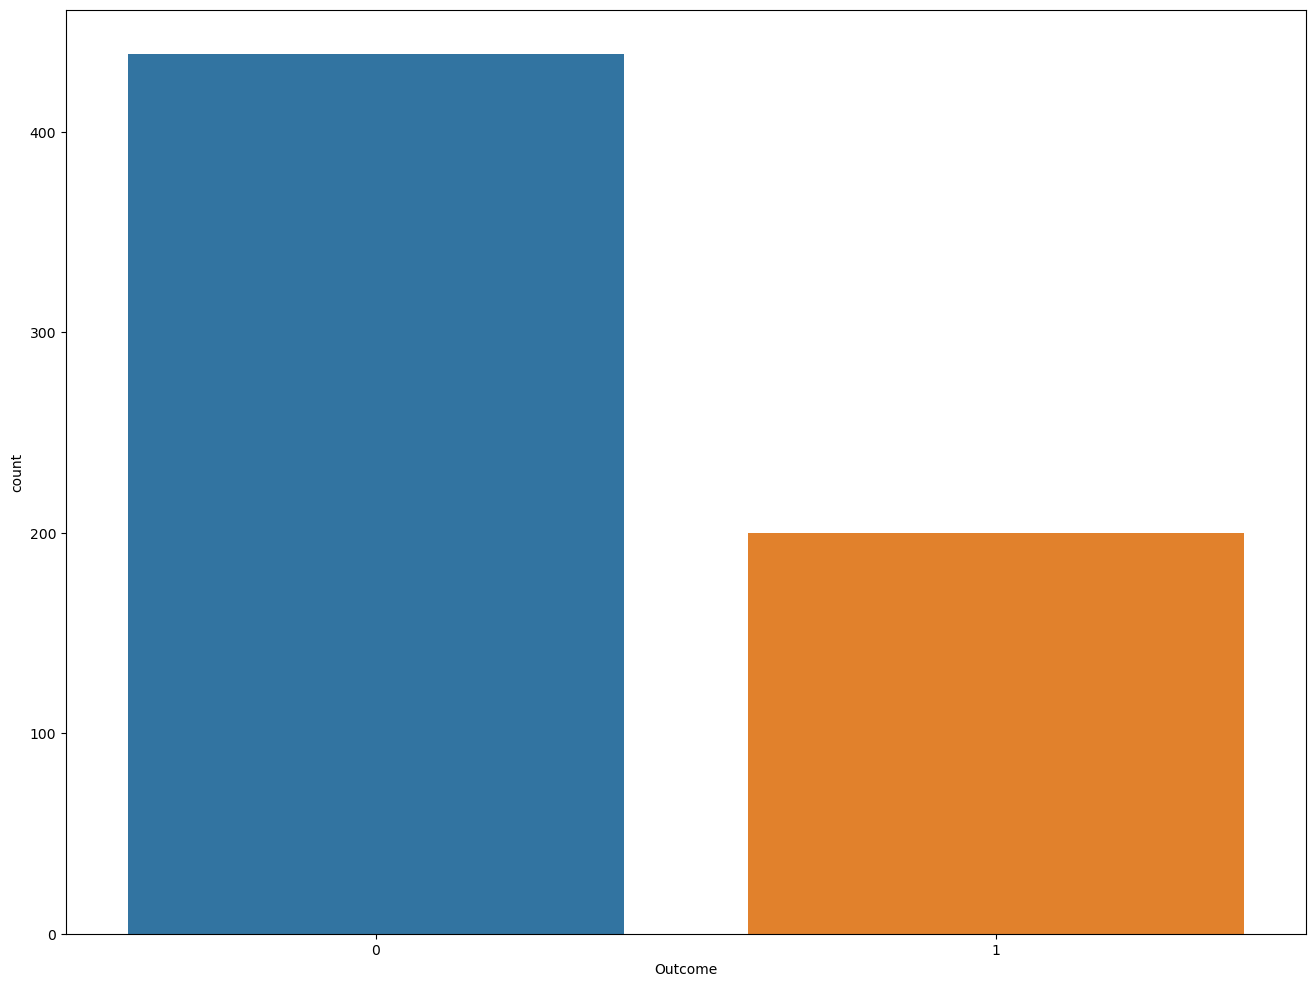

In [31]:
plt.figure(figsize = (16,12))
sns.countplot(data = data, x="Outcome")

In [29]:
count = data["Outcome"].value_counts()
print(count)

Outcome
0    439
1    200
Name: count, dtype: int64


## Relation between Pregnancies and BMI

In [32]:
data.columns

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')

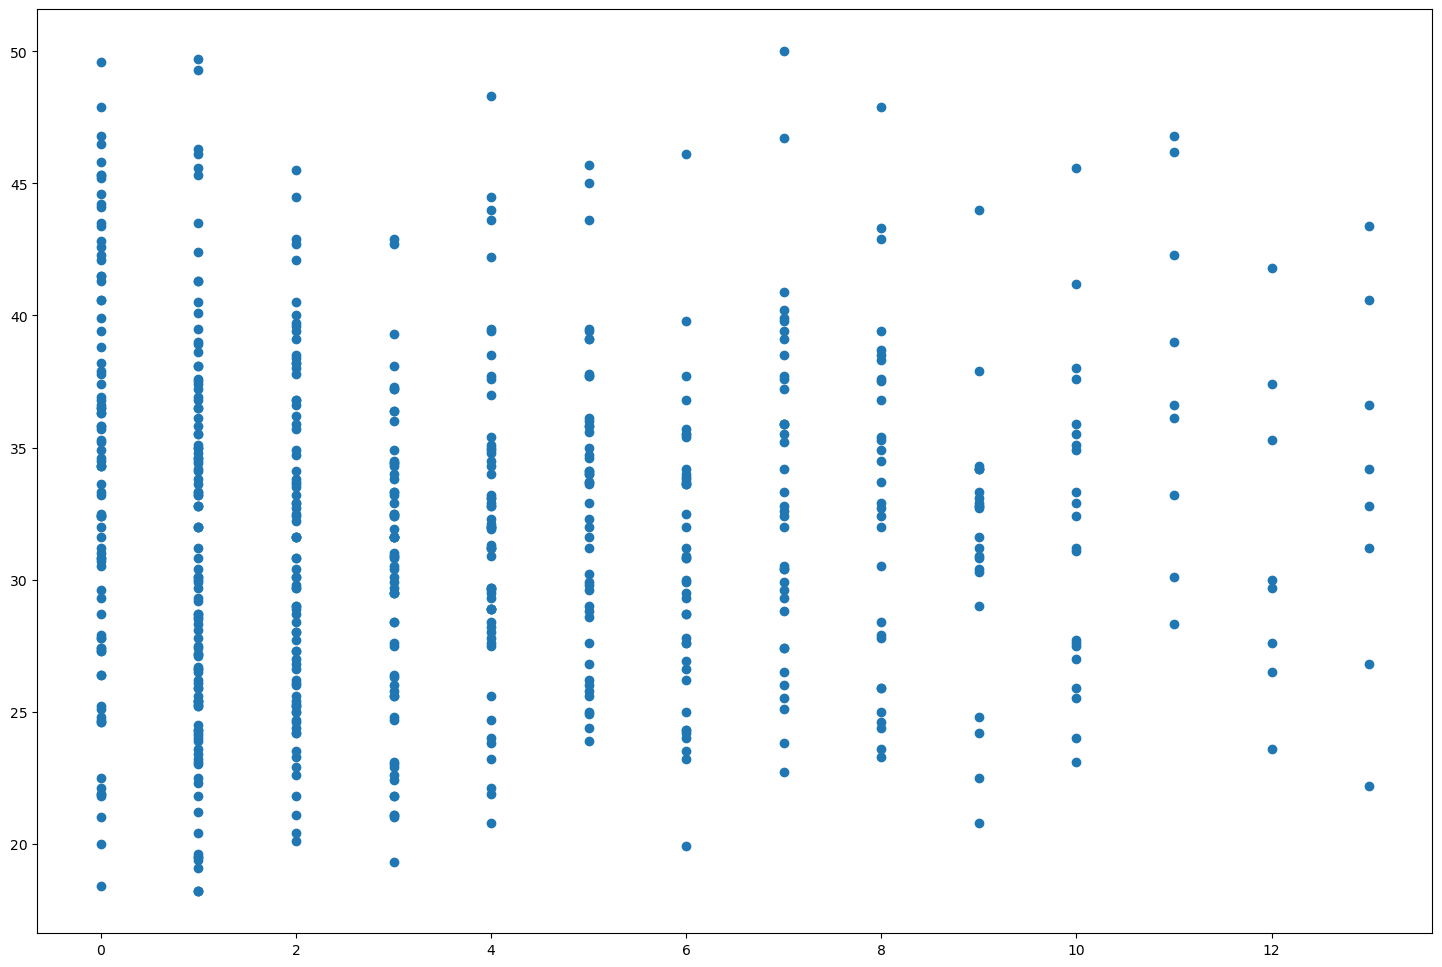

In [33]:
plt.figure(figsize = (18,12))
plt.scatter(data["Pregnancies"],data["BMI"])

In [34]:
data["Pregnancies"].unique()

array([ 6,  1,  8,  5,  3,  4, 10,  0,  7,  9, 11, 13,  2, 12],
      dtype=int64)

<Axes: xlabel='Pregnancies', ylabel='count'>

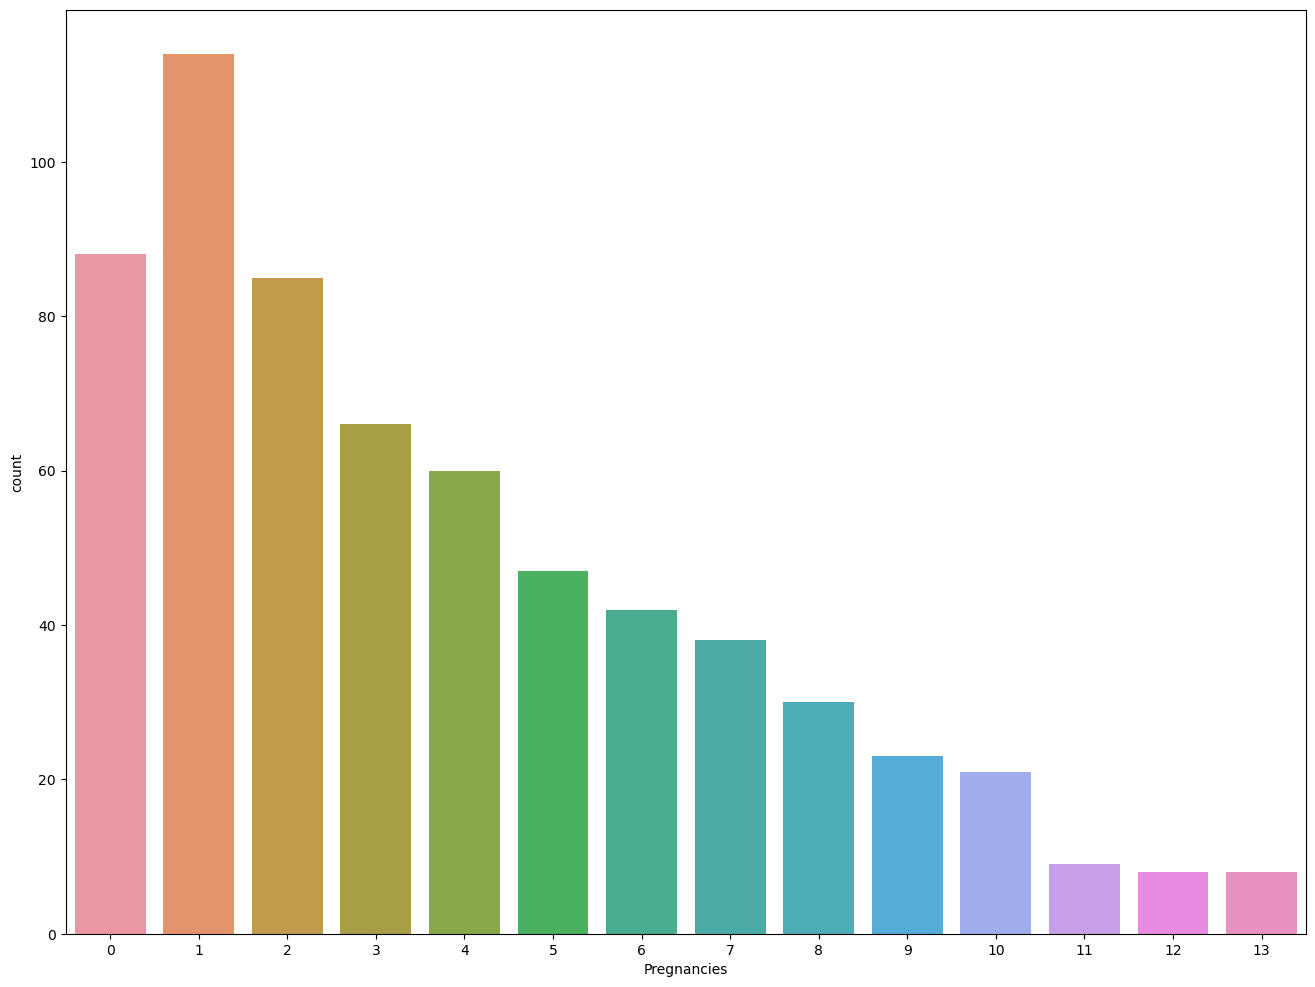

In [36]:
plt.figure(figsize = (16,12))
sns.countplot(data=data, x = "Pregnancies")

In [37]:
data.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
5,5,116,74,0,0,25.6,0.201,30,0


C:\Users\prajw\AppData\Local\Temp\ipykernel_7752\4126042923.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data['Age'].dropna(),kde=False,color='darkred',bins=40)


<Axes: xlabel='Age'>

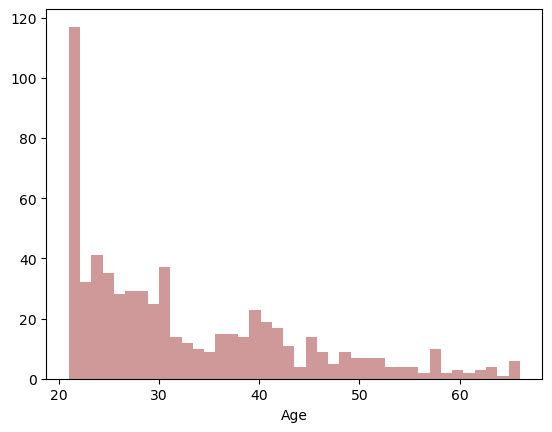

In [38]:
#### Some Distribution plot
sns.distplot(data['Age'].dropna(),kde=False,color='darkred',bins=40)

In [39]:
data.groupby(data["BloodPressure"])["Outcome"].sum()

BloodPressure
38      0
44      0
46      0
48      1
50      3
52      2
54      2
55      0
56      1
58      2
60      5
61      0
62      8
64     12
65      1
66     10
68      8
70     18
72     13
74     16
75      1
76     14
78     12
80     11
82      8
84     11
85      2
86      9
88      9
90     10
92      3
94      3
95      0
96      0
98      0
100     1
102     1
104     2
106     1
Name: Outcome, dtype: int64

In [40]:
y = data["Outcome"].copy()
y

0      1
1      0
2      1
3      0
5      0
      ..
763    0
764    0
765    0
766    1
767    0
Name: Outcome, Length: 639, dtype: int64

In [41]:
X = data.drop("Outcome",axis=1)
X

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,6,148,72,35,0,33.6,0.627,50
1,1,85,66,29,0,26.6,0.351,31
2,8,183,64,0,0,23.3,0.672,32
3,1,89,66,23,94,28.1,0.167,21
5,5,116,74,0,0,25.6,0.201,30
...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63
764,2,122,70,27,0,36.8,0.340,27
765,5,121,72,23,112,26.2,0.245,30
766,1,126,60,0,0,30.1,0.349,47


## Age histogram


(array([225., 111.,  73.,  53.,  70.,  32.,  30.,  14.,  17.,  14.]),
 array([21. , 25.5, 30. , 34.5, 39. , 43.5, 48. , 52.5, 57. , 61.5, 66. ]),
 <BarContainer object of 10 artists>)

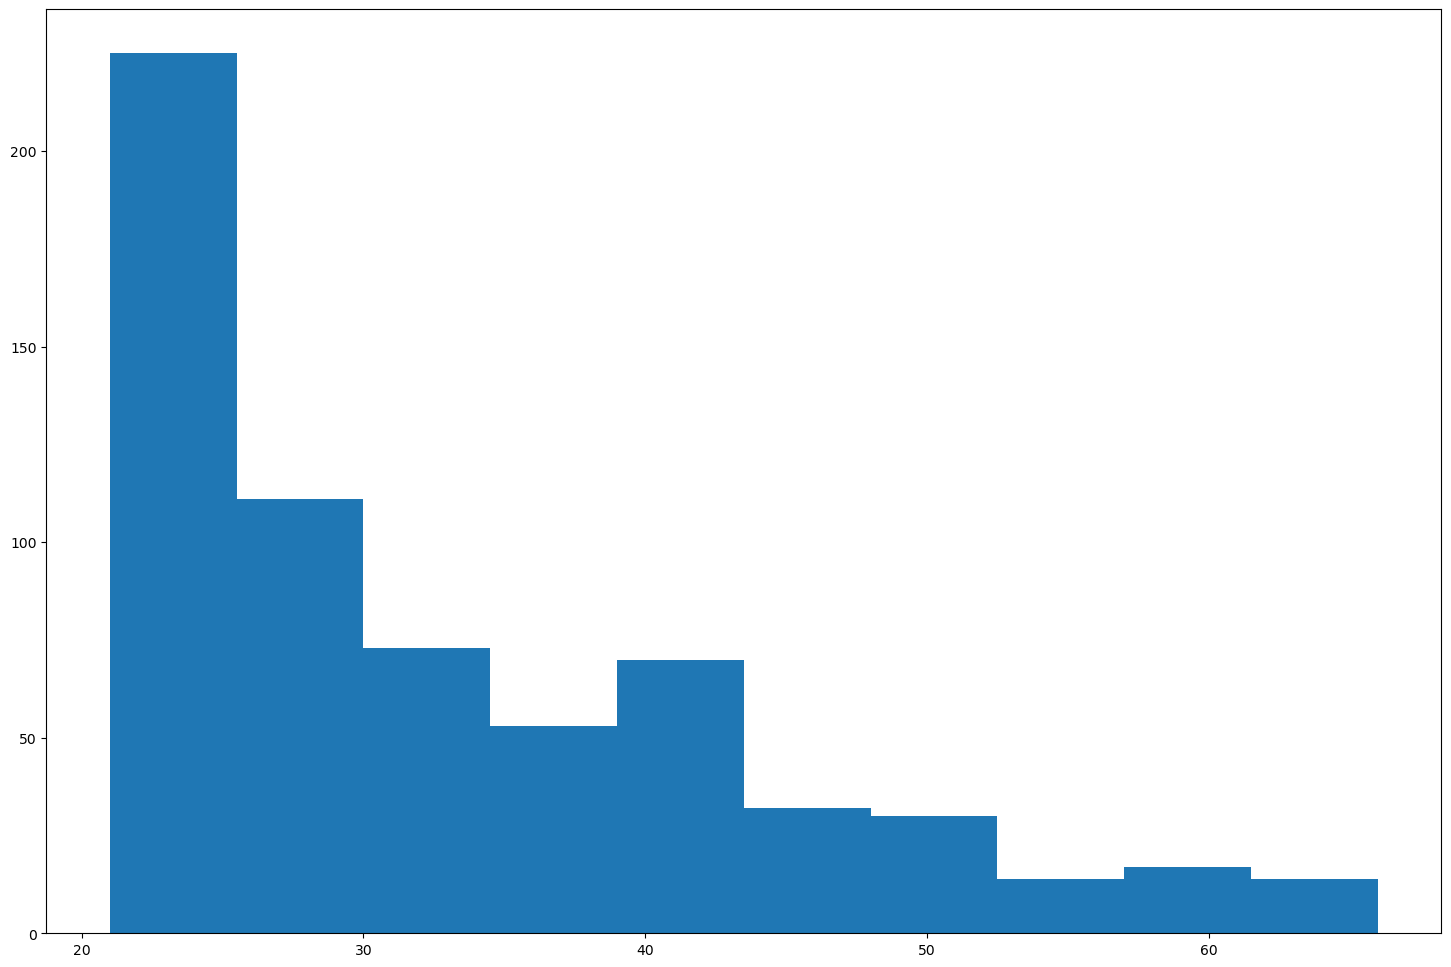

In [42]:
plt.figure(figsize = (18,12))
plt.hist(data["Age"])

In [43]:
X_train, X_test , y_train, y_test = train_test_split(X , y, test_size = 0.2, random_state = 42)

In [44]:
scale = StandardScaler()
X_train = scale.fit_transform(X_train)
X_test = scale.fit_transform(X_test)

## Logistic Regression

In [45]:
lr = LogisticRegression()
lr.fit(X_train, y_train)
lr_pred = lr.predict(X_test)
lr_pred

array([0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0,
       1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0], dtype=int64)

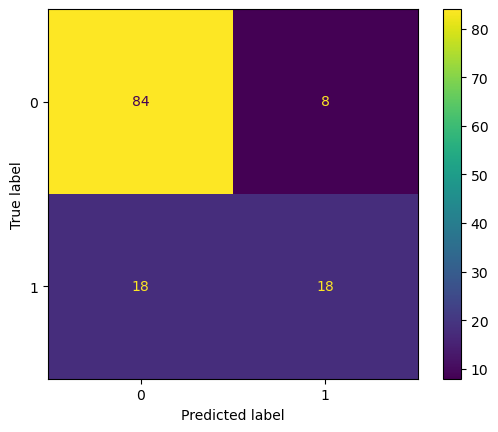

In [48]:
cm = confusion_matrix(y_test, lr_pred, labels=lr.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=lr.classes_)
disp.plot()

In [49]:
print(classification_report(y_test, lr_pred))

              precision    recall  f1-score   support

           0       0.82      0.91      0.87        92
           1       0.69      0.50      0.58        36

    accuracy                           0.80       128
   macro avg       0.76      0.71      0.72       128
weighted avg       0.79      0.80      0.79       128



In [50]:
rms = mean_squared_error(y_test, lr_pred, squared=False)
print(rms)

0.45069390943299864


In [51]:

#printing the accuracy for test set
print('Accuracy of Logistic regression model is {}'.format(accuracy_score(y_test,lr_pred)*100))

Accuracy of Logistic regression model is 79.6875


In [54]:
## Decision Tree model

In [56]:
dt = DecisionTreeClassifier(criterion='entropy',max_depth=2)
dt.fit(X_train, y_train)
dp = dt.predict(X_test)
print(classification_report(y_test,dp))

              precision    recall  f1-score   support

           0       0.80      0.93      0.86        92
           1       0.71      0.42      0.53        36

    accuracy                           0.79       128
   macro avg       0.76      0.68      0.70       128
weighted avg       0.78      0.79      0.77       128



## Visual confusion matrix

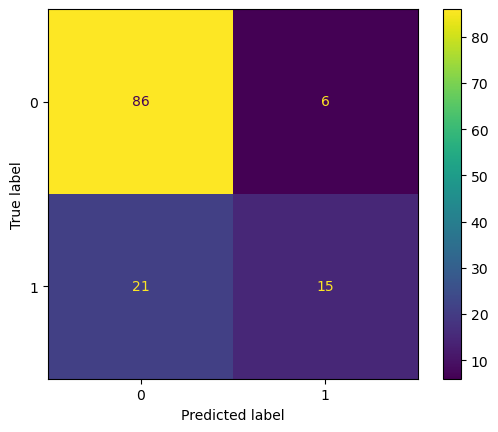

In [60]:
#plot_confusion_matrix(dt, X_test, y_test)


cm = confusion_matrix(y_test, y_pred=dp, labels=dt.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=dt.classes_)
disp.plot()

In [61]:
#printing the accuracy for test set
print('Accuracy of Decision Tree model is {}'.format(accuracy_score(y_test,dp)*100))

Accuracy of Decision Tree model is 78.90625


In [62]:
rms = mean_squared_error(y_test, dp, squared=False)
print(rms)

0.4592793267718459


In [63]:
## Randomforest


In [64]:
rf = RandomForestClassifier().fit(X_train,y_train)
rp = rf.predict(X_test)

In [65]:
print(classification_report(y_test, rp))

              precision    recall  f1-score   support

           0       0.84      0.87      0.86        92
           1       0.64      0.58      0.61        36

    accuracy                           0.79       128
   macro avg       0.74      0.73      0.73       128
weighted avg       0.78      0.79      0.79       128



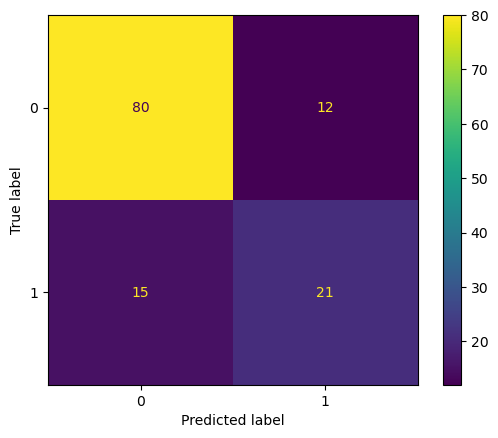

In [66]:
cm = confusion_matrix(y_test, y_pred=rp, labels=rf.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=rf.classes_)
disp.plot()

In [67]:
#printing the accuracy for test set
print('Accuracy of Random forest model is {}'.format(accuracy_score(y_test,rp)*100))

Accuracy of Random forest model is 78.90625


In [69]:
rms = mean_squared_error(y_test, rp, squared=False)
print(rms)

0.4592793267718459


Overall error and accuracy in Random forest is good among other models

In [70]:
filename = 'diabetes.sav'

joblib.dump(rf, filename)

['diabetes.sav']